In [ ]:
"""Licensed under the Apache License, Version 2.0."""

import matplotlib.pyplot as plt
import seaborn as sns

from IPython import display
import pandas as pd

# Library of analysis code common to experiments.
import protseq_analysis

In [ ]:
# Download the dataset from:
# Jess, Phillip (2021), “ProtSeq Data”, Mendeley Data, V1, doi: 10.17632/f9hdn5xc3v.1
# https://data.mendeley.com/datasets/f9hdn5xc3v/1

!wget https://data.mendeley.com/public-files/datasets/f9hdn5xc3v/files/d4ce0d83-88c6-4208-8e98-adc074c65b55/file_downloaded -O "peptide nanobody BCS Base calls.fastq.gz"
!wget https://data.mendeley.com/public-files/datasets/f9hdn5xc3v/files/327343b8-11af-4fbc-afa9-2aeb07c3c8e7/file_downloaded -O "peptide nanobody BCS undertermined calls.fastq.gz"

In [ ]:
expt_dict = {
    'base': ['peptide nanobody BCS Base calls.fastq.gz'],
    'undertermined': ['peptide nanobody BCS undertermined calls.fastq.gz'],
}

component_names_str = '''
5Phos.O1_BCS4_Fd7	ATCAAGGC
5Phos.O1_BCS4_Fd8	CTAGTACG
5Phos.O1_BCS4_Fd11	TGCGTACA
Brady.O1_BCS4_Fd12	TGCAAACG
Brady.O1_BCS4_Fd13	CGGAAAGA
Brady.O1_BCS4_Fd14	GTGAGCAA
SP4.O1_BCS4_Fd15	CGTAACTC
SP4.O1_BCS4_Fd16	CTATATCA
SP4.O1_BCS4_Fd17	TCTAAGGT
Spot-Tag.O1_BCS4_Fd31	AGATGCCA
Spot-Tag.O1_BCS4_Fd19	TGGTACCT
Spot-Tag.O1_BCS4_Fd20	CGTAAGTG
SP6.O1_BCS4_Fd21	GCAGTACT
SP6.O1_BCS4_Fd22	TTGCCCAA
SP6.O1_BCS4_Fd23	ACGTGGAA
CLR.Null.Blk_BCS4_Fd24	TTGCTCCT
CLR.Null.Blk_BCS4_Fd25	GAAGGGAA
CLR.Null.Blk_BCS4_Fd26	ACCTCAGA
Spot-Tag.O1_BCS4_Fd27	CCACATGA
Spot-Tag.O1_BCS4_Fd28	GTTTGGTG
Spot-Tag.O1_BCS4_Fd29	GGGACAAT
AV.B4.U2.SA1.3	CTTGTATCTAGG
AV.B4.U2.SA2.3	AATGCCGAAGGT
AV.B4.U2.SA4.2	ACGTCGCCAATT
Spot_B4.Br.A4.R	CCGGTTAACAAA
'''

subseqs, component_dict, _ = protseq_analysis.get_subseqs_from_component_names(component_names_str)
foundation_dict = protseq_analysis.get_foundation_dict(component_dict)
full_df = protseq_analysis.read_fastqs_for_experiment(expt_dict, num_reads=100000000, subseqs=subseqs, n_common=50000000, dist_for_clustering=0)

In [ ]:
cycle_dfs, cycle_correspondence = protseq_analysis.foundation_partner_cycle_table(full_df, foundation_dict,
                                                                          component_dict, cycles_to_check=1, heatmap=False,
                                                                          allow_overlaps=False)
first_cycle_df = cycle_dfs[1]
first_cycle_df['binder'] = ['SP4.2', 'SP6', 'SP9 (Neg. Ctrl)', 'Spot-Tag']
plot_df = protseq_analysis.make_plot_df(first_cycle_df)

In [ ]:
def get_foundation(s):
  if s == 'Empty_Foundation':
    return 'Empty'
  else:
    return s.split('_')[-1]

def pivot_plot_df(plot_df):
  df = plot_df.copy()
  df['Target Foundation'] = df['target'].map(get_foundation)
  return pd.pivot(df, index=['Binder Target', 'Target Foundation'], values='Count', columns='Binder for').astype(int)

plot_df_pivoted = pivot_plot_df(plot_df)
with pd.option_context("display.max_rows", 1000):
  display.display(plot_df_pivoted)

Binder for                       SP4.2    SP6  SP9 (Neg. Ctrl)  Spot-Tag
Binder Target Target Foundation                                         
5Phos         Fd11                 180    970                1       288
              Fd7                  679   1269                4       611
              Fd8                   91    523                0       175
Brady         Fd12                  24    116                0        42
              Fd13                 516   1611                4      1663
              Fd14                 222   1113                1       603
CLR           Fd24                 224   1061                2       405
              Fd25                 233    930                3       558
              Fd26                  81    361                0        92
Empty         Empty                  0      0                0         0
SP4           Fd15                7201    397                0       207
              Fd16                8399    447                2       107
              Fd17               11355    441                1       188
SP6           Fd21                  83  28641                3       129
              Fd22                  82  28871                1       148
              Fd23                  50  21007                0        96
Spot-Tag      Fd19                 132    485                2      7013
              Fd20                 138    406                0      9825
              Fd27                 114    453               38      3461
              Fd28                 124    455                1      4976
              Fd29                 161    458                1     10803
              Fd31                 130    428                1      5256

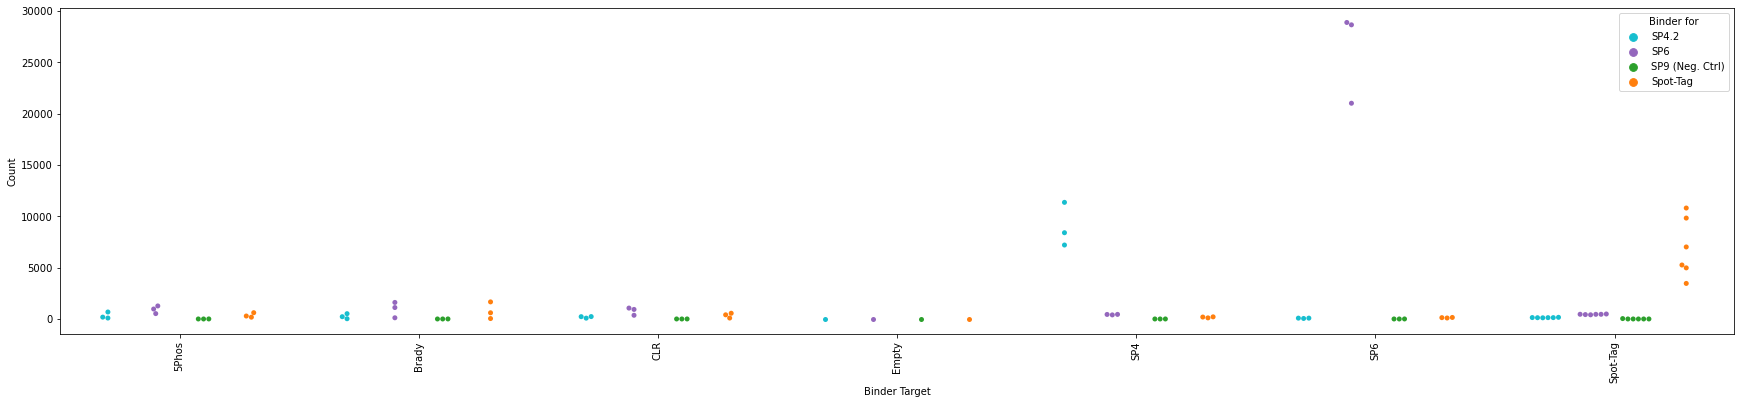

In [ ]:
def do_plot(plot_df, palette):
  plot_agg_df = plot_df.groupby(['Binder Target', 'target', 'Binder for']).sum().reset_index()
  plt.figure(figsize=(30,6))
  # plt.figure(figsize=(4.75, 2))  # Size for figure in paper.
  g = sns.swarmplot(data=plot_agg_df, palette=palette,
                    x='Binder Target', y='Count', hue='Binder for', dodge=True)
  g.set_xticklabels(g.get_xticklabels(), rotation=90) 
  plt.show()


do_plot(plot_df, palette={'SP4.2':'tab:cyan',
                          'SP6': 'tab:purple',
                          'SP9 (Neg. Ctrl)': 'tab:green',
                          'Spot-Tag': 'tab:orange'})